# Componentização Passo a Passo

## Passo 4 - Customização Externa

In [1]:
import iplantuml

Writing output for /home/santanche/git/component2learn/notebooks/componentization/breast-cancer/0e37c431-b887-4568-a9d3-4ef746829e4a.uml to 0e37c431-b887-4568-a9d3-4ef746829e4a.svg


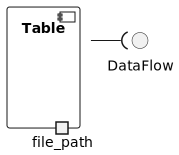

In [2]:
%%plantuml

@startuml

!procedure $property($name)
    portout $name
!endprocedure

component Table {
    $property(file_path)
}
[Table] -( DataFlow

@enduml

In [3]:
import pandas as pd

class Table:
    def __init__(self, path):
        self._path = None
        self.data = None
        self.connected_plots = []  # List to store connected ScatterPlot objects
        self.path = path  # Use the setter to initialize
    
    @property
    def path(self):
        return self._path
    
    @path.setter
    def path(self, value):
        if value != self._path:
            self._path = value
            try:
                self.data = pd.read_csv(value)
                print(f"Successfully loaded data from: {value}")
                # Automatically update all connected plots
                for plot in self.connected_plots:
                    plot.update_data(self.data)
            except Exception as e:
                print(f"Error loading file {value}: {e}")
                self.data = None
    
    def get_data(self):
        return self.data
    
    def connect(self, scatter_plot):
        self.connected_plots.append(scatter_plot)
        # Send current data to the newly connected plot
        if self.data is not None:
            scatter_plot.update_data(self.data)
    
    def read_new_file(self, path):
        self.path = path  # Use the setter which handles the file reading and updates
    
    def disconnect(self, scatter_plot):
        if scatter_plot in self.connected_plots:
            self.connected_plots.remove(scatter_plot)

Writing output for /home/santanche/git/component2learn/notebooks/componentization/breast-cancer/2dd8784b-2d3f-47cc-acd9-46ad70dc78ef.uml to 2dd8784b-2d3f-47cc-acd9-46ad70dc78ef.svg


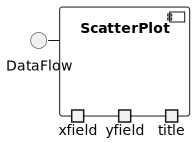

In [4]:
%%plantuml

!procedure $property($name)
    portout $name
!endprocedure

@startuml
component ScatterPlot {
    $property(xfield)
    $property(yfield)
    $property(title)
}
DataFlow - [ScatterPlot]
@enduml

In [5]:
import matplotlib.pyplot as plt

class ScatterPlot:
    def __init__(self, xlabel, ylabel, title):
        self.df = None
        self._xlabel = None
        self._ylabel = None
        self._title = None
        
        # Use setters to initialize (this allows for future validation if needed)
        self.xlabel = xlabel
        self.ylabel = ylabel
        self.title = title
    
    @property
    def xlabel(self):
        return self._xlabel
    
    @xlabel.setter
    def xlabel(self, value):
        if value != self._xlabel:
            self._xlabel = value
            if self.df is not None:
                print(f"X-axis updated to: {value}")
                self.create_plot()
    
    @property
    def ylabel(self):
        return self._ylabel
    
    @ylabel.setter
    def ylabel(self, value):
        if value != self._ylabel:
            self._ylabel = value
            if self.df is not None:
                print(f"Y-axis updated to: {value}")
                self.create_plot()
    
    @property
    def title(self):
        return self._title
    
    @title.setter
    def title(self, value):
        if value != self._title:
            self._title = value
            if self.df is not None:
                print(f"Title updated to: {value}")
                self.create_plot()
    
    def update_data(self, df):
        self.df = df
        self.create_plot()
    
    def create_plot(self):
        if self.df is None:
            print("No data available to plot")
            return
        
        if self._xlabel not in self.df.columns:
            print(f"Error: Column '{self._xlabel}' not found in dataset")
            return
            
        if self._ylabel not in self.df.columns:
            print(f"Error: Column '{self._ylabel}' not found in dataset")
            return
        
        plt.figure(figsize=(10, 6))
        
        # Check if diagnosis column exists
        if 'diagnosis' not in self.df.columns:
            print("Warning: 'diagnosis' column not found. Plotting all points in blue.")
            plt.scatter(self.df[self._xlabel], self.df[self._ylabel], 
                       c='blue', alpha=0.6, label='All data')
        else:
            # Plot B (Benign) cases in blue
            benign = self.df[self.df['diagnosis'] == 'B']
            if not benign.empty:
                plt.scatter(benign[self._xlabel], benign[self._ylabel], 
                           c='blue', alpha=0.6, label='Benign (B)')
            
            # Plot M (Malignant) cases in red
            malignant = self.df[self.df['diagnosis'] == 'M']
            if not malignant.empty:
                plt.scatter(malignant[self._xlabel], malignant[self._ylabel], 
                           c='red', alpha=0.6, label='Malignant (M)')
        
        # Add labels and title
        plt.xlabel(self._xlabel)
        plt.ylabel(self._ylabel)
        plt.title(self._title)
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # Show the plot
        plt.tight_layout()
        plt.show()

Writing output for /home/santanche/git/component2learn/notebooks/componentization/breast-cancer/11094c2f-be92-4e3b-8f31-328f76bd2076.uml to 11094c2f-be92-4e3b-8f31-328f76bd2076.svg


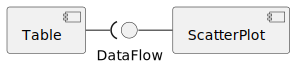

In [6]:
%%plantuml

@startuml
[Table] -( DataFlow 
DataFlow - [ScatterPlot]
@enduml

Successfully loaded data from: breast-cancer-wisconsin.csv
Connecting plot to table...


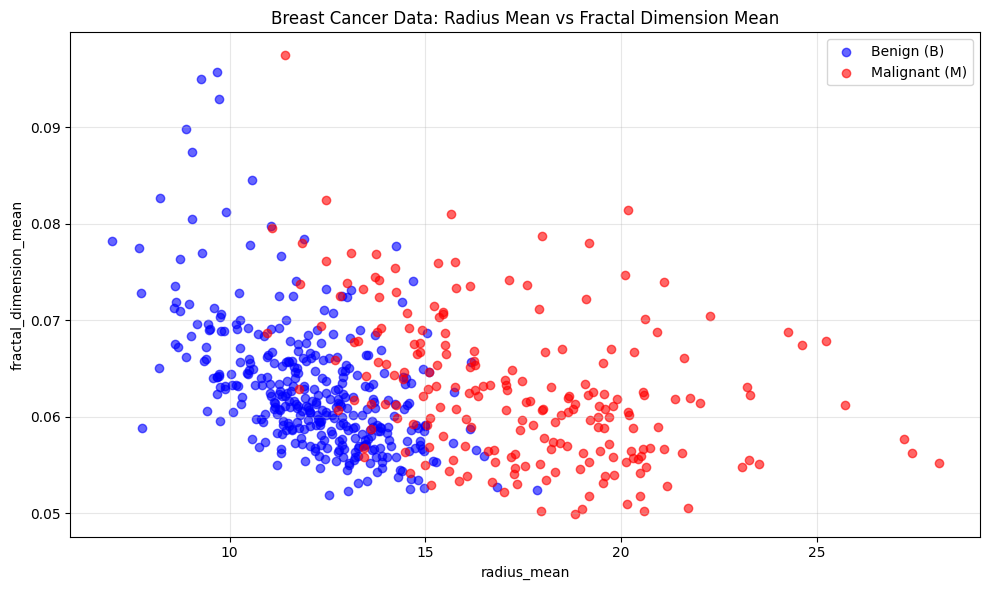


Changing plot properties...
X-axis updated to: texture_mean


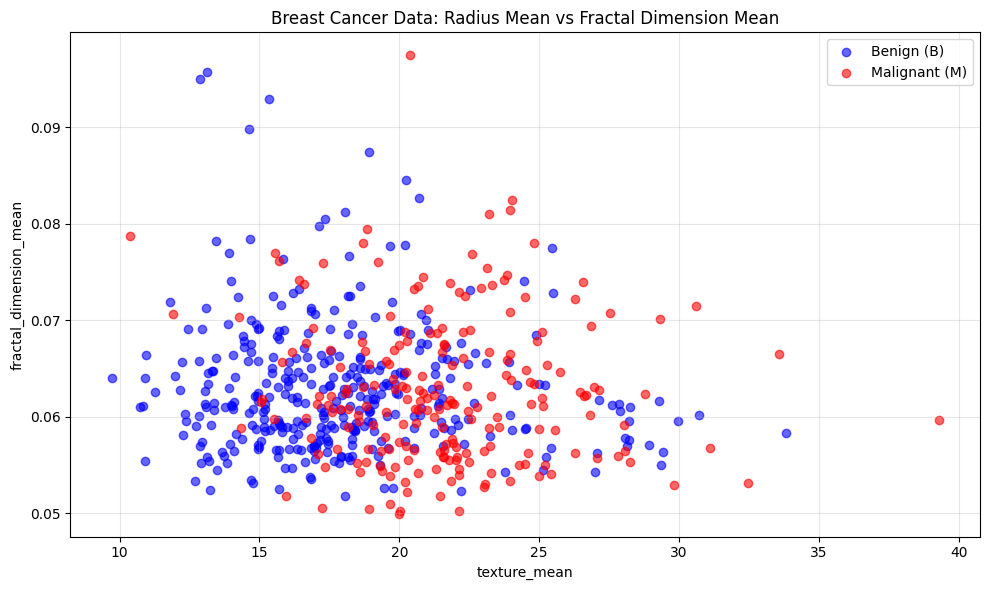

Y-axis updated to: perimeter_mean


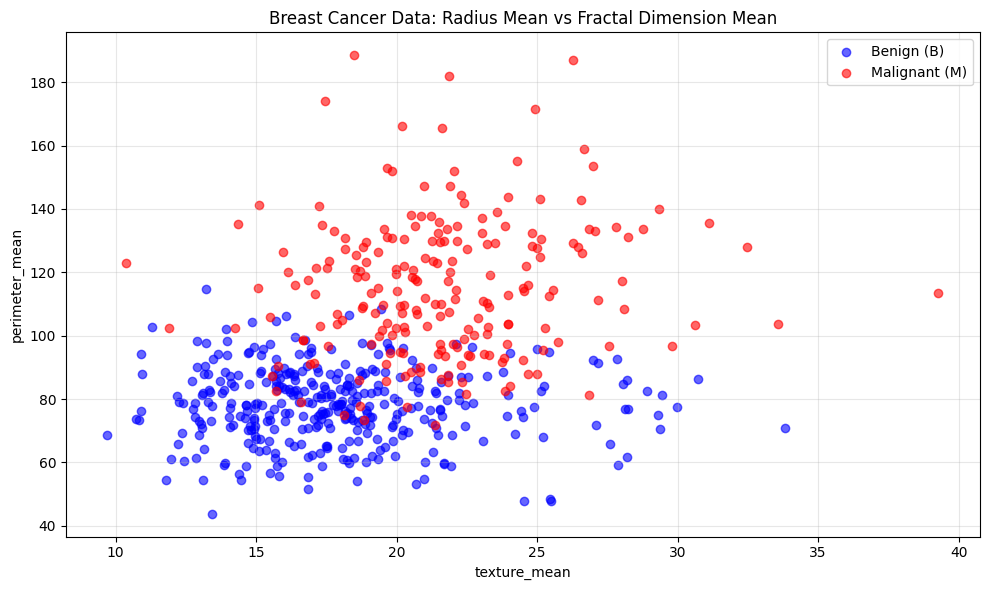

Title updated to: Updated Plot: Texture Mean vs Perimeter Mean


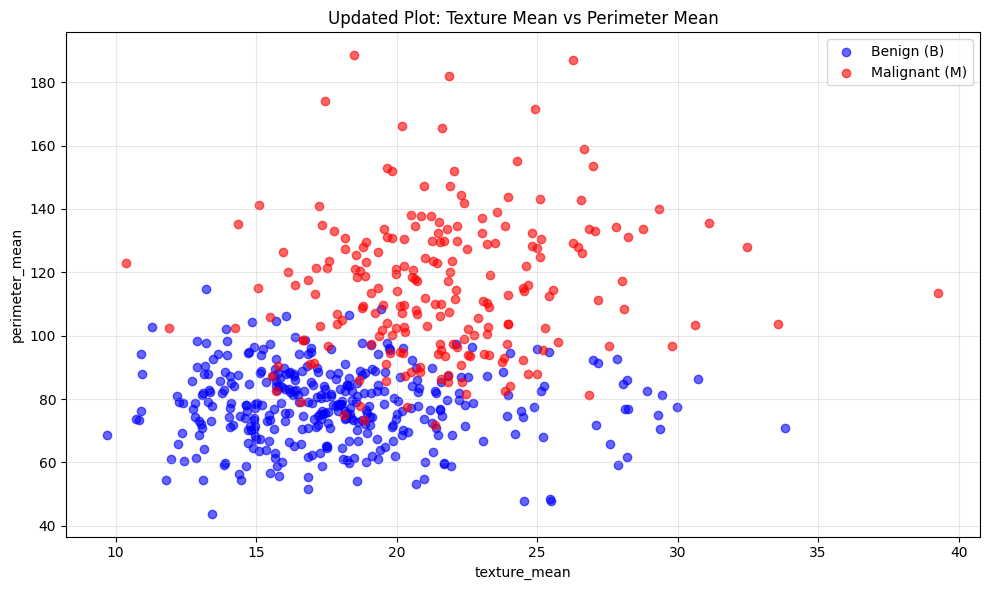

In [7]:
# Create a Table object and load the initial data
data_table = Table('breast-cancer-wisconsin.csv')

# Create ScatterPlot objects
plot1 = ScatterPlot('radius_mean', 
                    'fractal_dimension_mean', 
                    'Breast Cancer Data: Radius Mean vs Fractal Dimension Mean')

# Connect the plot to the table
print("Connecting plot to table...")
data_table.connect(plot1)

# Demonstrate property usage - changing plot properties
print("\nChanging plot properties...")
plot1.xlabel = 'texture_mean'  # This will automatically update the plot
plot1.ylabel = 'perimeter_mean'  # This will automatically update the plot
plot1.title = 'Updated Plot: Texture Mean vs Perimeter Mean'  # This will update the plot